In [7]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import torch
import transformers
from germansentiment import SentimentModel

In [8]:
df = pd.read_csv("../data/final.csv")
df.head()

,id,description,address,group_,lon,lat,year,month,reported,approved,checked,approved_in,district,main_cat,sub_cat
0,3470,alle Straßenlaternen um das Schnetztor defekt....,"Obere Laube 66, 78462 Konstanz, Germany",Stadtwerke Konstanz\n,9.170475,47.658698,2020,6,2020-06-06 23:48:00,2020-06-08 05:31:00,2020-06-08 05:31:00,1.2,Altstadt,Beleuchtung,Straßenlaternen defekt
1,3475,Bei Nässe spiegelglatte Stelle. Ich bin am Don...,"Hussenstraße 24, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.172454,47.659835,2020,6,2020-06-07 19:26:00,2020-06-08 05:33:00,2020-06-08 05:33:00,0.4,Altstadt,Hinweise,Hinweise
2,3476,Warnschild des Zebrastreifens zum x-ten mal um...,"Emmishofer Str. 7, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.170046,47.656598,2020,6,2020-06-08 17:08:00,2020-06-09 08:25:00,2020-06-09 08:25:00,0.6,Altstadt,"Straßen, Fahrrad & Verkehr",Schilder unkenntlich
3,3495,Bei der Fussgängerampel direkt vor dem Taschen...,"Rosgartenstraße 31, 78462 Konstanz, Germany",Tiefbauamt,9.174359,47.658116,2020,6,2020-06-13 18:23:00,2020-06-15 07:50:00,2020-06-15 07:50:00,1.6,Altstadt,"Straßen, Fahrrad & Verkehr",Ampel defekt
4,3583,"Hallo,\n\nder Spielplatz an der Kreuzlingerstr...","Kreuzlinger Str. 26, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.171569,47.657161,2020,6,2020-06-29 11:46:00,2020-06-29 14:04:00,2020-06-29 14:04:00,0.1,Altstadt,Öffentliche Orte/Ufer,Spielplätze schadhaft / verunreinigt


In [18]:
model = SentimentModel()

In [25]:
def sentiment_func(x):
    sentiment = model.predict_sentiment([x])
    return sentiment

df["sentiment"] =  df.description.apply(sentiment_func)

In [26]:
df.head()

,id,description,address,group_,lon,lat,year,month,reported,approved,checked,approved_in,district,main_cat,sub_cat,sentiment
0,3470,alle Straßenlaternen um das Schnetztor defekt....,"Obere Laube 66, 78462 Konstanz, Germany",Stadtwerke Konstanz\n,9.170475,47.658698,2020,6,2020-06-06 23:48:00,2020-06-08 05:31:00,2020-06-08 05:31:00,1.2,Altstadt,Beleuchtung,Straßenlaternen defekt,[negative]
1,3475,Bei Nässe spiegelglatte Stelle. Ich bin am Don...,"Hussenstraße 24, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.172454,47.659835,2020,6,2020-06-07 19:26:00,2020-06-08 05:33:00,2020-06-08 05:33:00,0.4,Altstadt,Hinweise,Hinweise,[negative]
2,3476,Warnschild des Zebrastreifens zum x-ten mal um...,"Emmishofer Str. 7, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.170046,47.656598,2020,6,2020-06-08 17:08:00,2020-06-09 08:25:00,2020-06-09 08:25:00,0.6,Altstadt,"Straßen, Fahrrad & Verkehr",Schilder unkenntlich,[neutral]
3,3495,Bei der Fussgängerampel direkt vor dem Taschen...,"Rosgartenstraße 31, 78462 Konstanz, Germany",Tiefbauamt,9.174359,47.658116,2020,6,2020-06-13 18:23:00,2020-06-15 07:50:00,2020-06-15 07:50:00,1.6,Altstadt,"Straßen, Fahrrad & Verkehr",Ampel defekt,[neutral]
4,3583,"Hallo,\n\nder Spielplatz an der Kreuzlingerstr...","Kreuzlinger Str. 26, 78462 Konstanz, Germany",Technische Betriebe Konstanz\n\n,9.171569,47.657161,2020,6,2020-06-29 11:46:00,2020-06-29 14:04:00,2020-06-29 14:04:00,0.1,Altstadt,Öffentliche Orte/Ufer,Spielplätze schadhaft / verunreinigt,[negative]


In [32]:
def func(x):
    return x[0]
df.sentiment = df.sentiment.apply(func)

In [33]:
df.to_csv("../data/final_sentiment_.csv", index=False)
df.to_excel("../data/final_sentiment.xlsx", index=False)

In [79]:
values = list(df.sentiment.value_counts().values)

AttributeError: 'Series' object has no attribute 'names'

In [82]:
["neutral","negative", "positive"]

neutral     1890
negative    1809
positive      92
Name: sentiment, dtype: int64

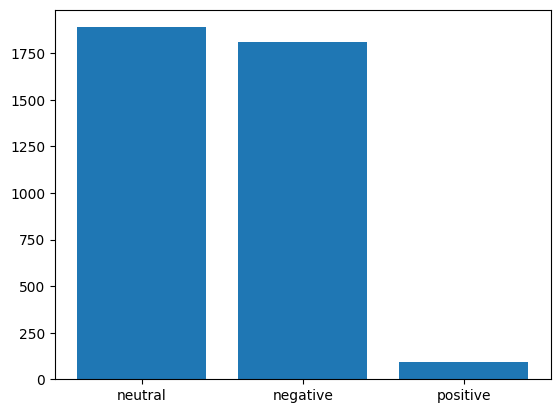

In [86]:
plt.bar(height=values, x=["neutral","negative", "positive"])
plt.savefig('../plots/sentiment_bar.png')

In [63]:
df[df.sentiment=="positive"].iloc[50,1]

'Auf den Säulen der Einfahrt zur Stromeyersdorfstr. 12 sind antike Lampen montiert.\nBeim Sturm letzte Woche hat sich der Deckel / das Dach einer Lampe losgerissen und ist auf den Boden gefallen.\nDer Deckel war mit einem Draht befestigt. \nBitte befestigen Sie den Deckel wieder. Vielleicht eignen sich schwarze Kabelbinder besser. \nSicherheitshalber sollte evtl. die zweite Lampe auch überprüft werden.\nIm Hof parken Autos, die könnten durch herumfliegende Deckel beschädigt werden.\nIch habe den Deckel an der Säule am Boden angelehnt.'